In [36]:
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import time
import matplotlib.pyplot as plt

In [37]:

# Start de WebDriver (zorg dat de juiste webdriver, zoals ChromeDriver, beschikbaar is)
driver = webdriver.Chrome()

# Open de website
driver.get("https://dbnyu.github.io/OpenBirdcageBuilder/")

# Wacht even zodat de pagina volledig laadt
time.sleep(2)

# Zoek de drop-down op via de ID
select_element = driver.find_element(By.ID, "num_legs")

# Maak een Select-object aan
dropdown = Select(select_element)

# Selecteer de optie met waarde "16"
dropdown.select_by_value("16")

# Vul het invoerveld met id "coil_radius" met 12.8
coil_radius_input = driver.find_element(By.ID, "coil_radius")
coil_radius_input.clear()
coil_radius_input.send_keys("12.8")

# Vul het invoerveld met id "shield_radius" met 18
shield_radius_input = driver.find_element(By.ID, "shield_radius")
shield_radius_input.clear()
shield_radius_input.send_keys("18")

# Vul het invoerveld met id "leg_len" met 23
leg_len_input = driver.find_element(By.ID, "leg_len")
leg_len_input.clear()
leg_len_input.send_keys("23")

# Zoek de radio-button met id "config_bp_er" en klik deze
radio_button = driver.find_element(By.ID, "config_bp_er")
radio_button.click()

# Klik op de radio-button met id "leg_tube"
leg_tube_radio = driver.find_element(By.ID, "leg_tube")
leg_tube_radio.click()

# Vul het inputveld met id "leg_ID" met de waarde 0.1
leg_ID_input = driver.find_element(By.ID, "leg_ID")
leg_ID_input.clear()  # Maak het veld leeg
leg_ID_input.send_keys("0.1")

# Vul het inputveld met id "leg_OD" met de waarde 0.2
leg_OD_input = driver.find_element(By.ID, "leg_OD")
leg_OD_input.clear()  # Maak het veld leeg
leg_OD_input.send_keys("0.2")

# Klik op de radio-button met id "er_tube"
er_tube_radio = driver.find_element(By.ID, "er_tube")
er_tube_radio.click()

# Vul het inputveld "er_ID" met 0.1
er_ID_input = driver.find_element(By.ID, "er_ID")
er_ID_input.clear()
er_ID_input.send_keys("0.1")

# Vul het inputveld "er_OD" met 0.2
er_OD_input = driver.find_element(By.ID, "er_OD")
er_OD_input.clear()
er_OD_input.send_keys("0.2")

In [38]:
ER_capacitance = np.linspace(3, 6, 100)
print(ER_capacitance)

[3.         3.03030303 3.06060606 3.09090909 3.12121212 3.15151515
 3.18181818 3.21212121 3.24242424 3.27272727 3.3030303  3.33333333
 3.36363636 3.39393939 3.42424242 3.45454545 3.48484848 3.51515152
 3.54545455 3.57575758 3.60606061 3.63636364 3.66666667 3.6969697
 3.72727273 3.75757576 3.78787879 3.81818182 3.84848485 3.87878788
 3.90909091 3.93939394 3.96969697 4.         4.03030303 4.06060606
 4.09090909 4.12121212 4.15151515 4.18181818 4.21212121 4.24242424
 4.27272727 4.3030303  4.33333333 4.36363636 4.39393939 4.42424242
 4.45454545 4.48484848 4.51515152 4.54545455 4.57575758 4.60606061
 4.63636364 4.66666667 4.6969697  4.72727273 4.75757576 4.78787879
 4.81818182 4.84848485 4.87878788 4.90909091 4.93939394 4.96969697
 5.         5.03030303 5.06060606 5.09090909 5.12121212 5.15151515
 5.18181818 5.21212121 5.24242424 5.27272727 5.3030303  5.33333333
 5.36363636 5.39393939 5.42424242 5.45454545 5.48484848 5.51515152
 5.54545455 5.57575758 5.60606061 5.63636364 5.66666667 5.69696

In [39]:
freq_list = [268,298,328]
freq_leg_list = []
for freq in freq_list:
    # Zoek het input-veld met id "center_freq"
    center_freq_input = driver.find_element(By.ID, "center_freq")
    # Maak het veld leeg en vul de gewenste waarde in
    center_freq_input.clear()
    center_freq_input.send_keys(freq)

    list_leg_cap = []
    for cap in ER_capacitance:
        # Zoek het input-veld met id "bp_predcap"
        bp_predcap_input = driver.find_element(By.ID, "bp_predcap")
        bp_predcap_input.clear()  # Maak het veld leeg
        bp_predcap_input.send_keys(cap)  # Vul "4.7" in
    
        # Klik op de "Calculate!"-knop
        calculate_button = driver.find_element(By.XPATH, "//button[text()='Calculate!']")
        calculate_button.click()
    
        # Wacht even zodat de berekening voltooid is en de resultaten worden bijgewerkt
        time.sleep(0.01)

        # Lees de waarde uit de <td> met id "calc_cap" en sla deze op in een variabele
        calc_cap_elem = driver.find_element(By.ID, "calc_cap")
        calc_cap_value = calc_cap_elem.text
        list_leg_cap.append(calc_cap_value)
    freq_leg_list.append(list_leg_cap)

In [40]:
# Sluit de browser
driver.quit()

In [43]:
for i in freq_leg_list:
    for j in range(len(i)):
        i[j] = float(i[j])

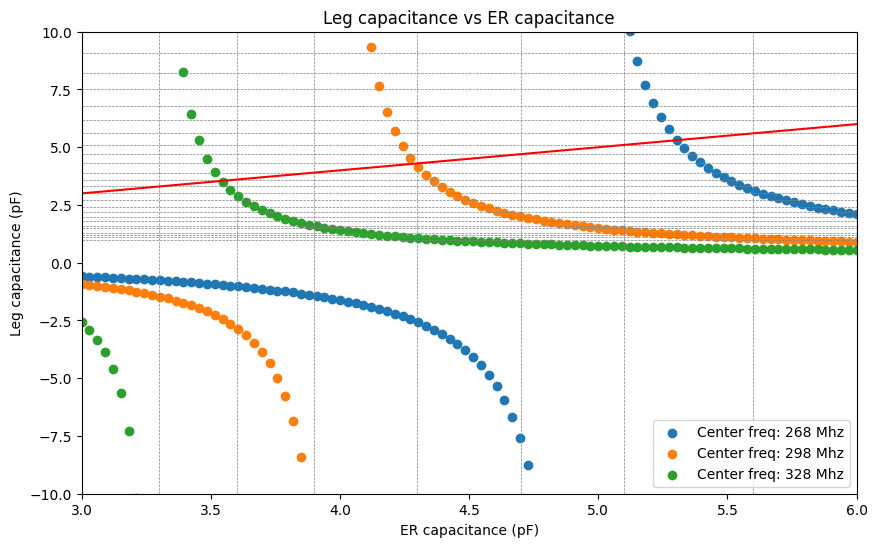

In [53]:
plt.figure(figsize=(10, 6))
for i in range(len(freq_list)):
    plt.scatter(ER_capacitance, freq_leg_list[i], label=f'Center freq: {freq_list[i]} Mhz')
plt.xlabel('ER capacitance (pF)')
plt.ylabel('Leg capacitance (pF)')
plt.title('Leg capacitance vs ER capacitance')
plt.legend()
#plt.grid()
plt.ylim(-10, 10)
plt.xlim(3, 6)
# List of values where lines should be plotted
line_values = [1.0, 1.1, 1.2, 1.3, 1.5, 1.6, 1.8, 2.0, 2.2, 2.4, 2.7, 3.0, 3.3, 3.6, 3.9, 4.3, 4.7, 5.1, 5.6, 6.2, 6.8, 7.5, 8.2, 9.1]

# Adding horizontal and vertical lines
for value in line_values:
    plt.axhline(y=value, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(x=value, color='gray', linestyle='--', linewidth=0.5)

#plot a line with y=x
x = np.linspace(3, 6, 100)
y = x
plt.plot(x, y, color='r',label='y=x or highpass to lowpass')
plt.show()

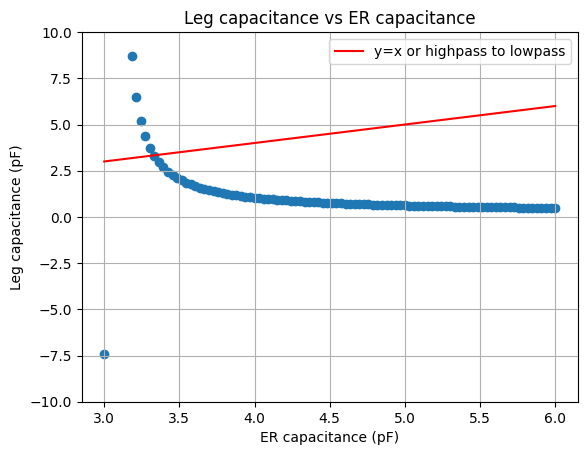

In [34]:
plt.scatter(ER_capacitance, list_leg_cap)
plt.xlabel('ER capacitance (pF)')
plt.ylabel('Leg capacitance (pF)')
plt.title('Leg capacitance vs ER capacitance')
plt.ylim(-10, 10)
plt.grid()
#plot a line with y=x
x = np.linspace(3, 6, 100)
y = x
plt.plot(x, y, color='r',label='y=x or highpass to lowpass')
plt.legend()

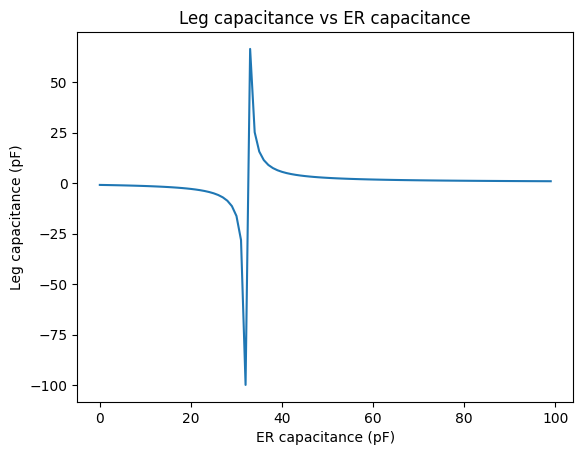

In [22]:
plt.plot(list_leg_cap)
plt.xlabel('ER capacitance (pF)')
plt.ylabel('Leg capacitance (pF)')
plt.title('Leg capacitance vs ER capacitance')
plt.show()